In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/datasetsIF/male_players.csv')

In [26]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
print(df.head())

   Unnamed: 0.1  Unnamed: 0  Rank             Name  OVR  PAC  SHO  PAS  DRI  \
0             0           0     1    Kylian Mbappé   91   97   90   80   92   
1             1           1     2            Rodri   91   66   80   86   84   
2             2           2     4   Erling Haaland   91   88   92   70   81   
3             3           3     5  Jude Bellingham   90   80   87   83   88   
4             4           4     7         Vini Jr.   90   95   84   81   91   

   DEF  ...   Nation            League             Team  \
0   36  ...   France  LALIGA EA SPORTS      Real Madrid   
1   87  ...    Spain    Premier League  Manchester City   
2   45  ...   Norway    Premier League  Manchester City   
3   78  ...  England  LALIGA EA SPORTS      Real Madrid   
4   29  ...   Brazil  LALIGA EA SPORTS      Real Madrid   

                                          play style  \
0  Quick Step+, Acrobatic, Finesse Shot, Flair, R...   
1  Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...   
2 

In [27]:
# Selecionar as características relevantes para o modelo de regressão linear
features = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
target = 'OVR'

In [28]:
# Dividir os dados em conjuntos de treinamento e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Função para exibir métricas
def evaluate_model(model_name, y_test, y_pred):
    print(f"### {model_name} ###")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    print("-" * 30)

In [30]:
# ---------------- Linear Regression ----------------

In [31]:
# Criar e treinar o modelo de regressão linear
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [32]:
# Fazer previsões no conjunto de teste
y_pred_linear = linearRegressionModel.predict(X_test)

In [33]:
# Avaliar o modelo
evaluate_model("Linear Regression", y_test, y_pred_linear)

### Linear Regression ###
Mean Absolute Error (MAE): 2.52
Mean Squared Error (MSE): 10.32
Root Mean Squared Error (RMSE): 3.21
R2 Score: 0.78
------------------------------


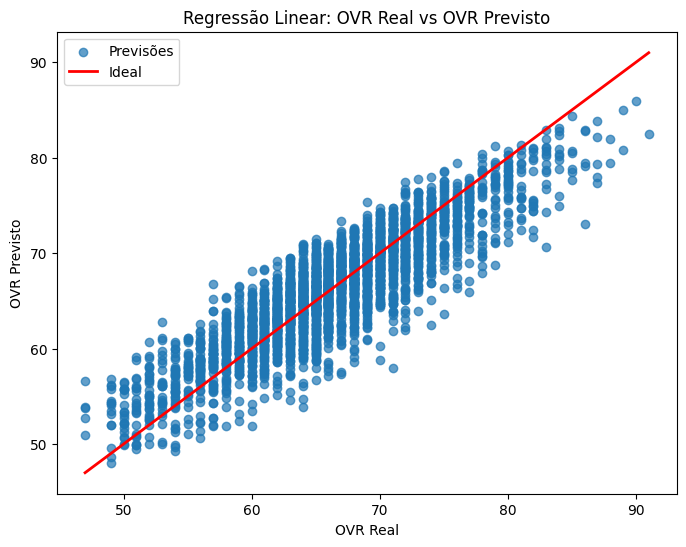

In [34]:
# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Ideal")
plt.xlabel('OVR Real')
plt.ylabel('OVR Previsto')
plt.title('Regressão Linear: OVR Real vs OVR Previsto')
plt.legend()
plt.show()

In [35]:
# Imprimir os coeficientes do modelo
coefficients = pd.DataFrame(linearRegressionModel.coef_, features, columns=['Coefficient'])
print(coefficients)

     Coefficient
PAC     0.017031
SHO     0.021955
PAS     0.058406
DRI     0.408365
DEF     0.092562
PHY     0.277548


In [36]:
# ---------------- Decision Tree ----------------

In [43]:
# Criar e treinar o modelo de árvore de decisão
decisionTreeModel = DecisionTreeRegressor(random_state=42)
decisionTreeModel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
# Fazer previsões no conjunto de teste
y_pred_tree = decisionTreeModel.predict(X_test)

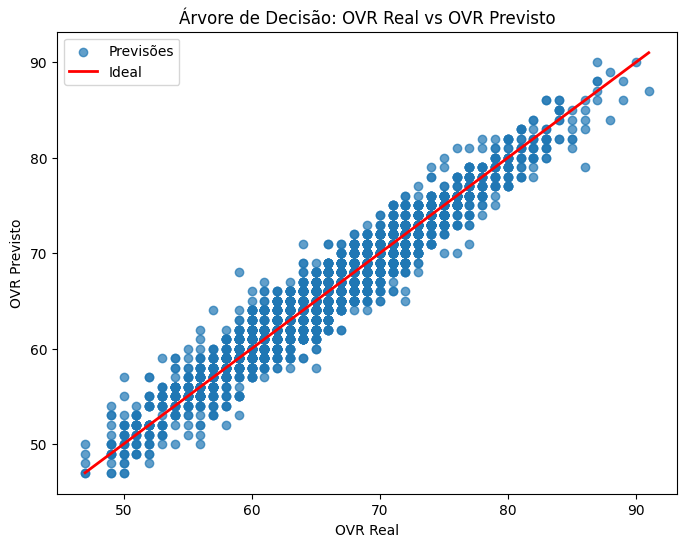

In [45]:
# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7, label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Ideal")
plt.xlabel('OVR Real')
plt.ylabel('OVR Previsto')
plt.title('Árvore de Decisão: OVR Real vs OVR Previsto')
plt.legend()
plt.show()

In [46]:
# Imprimir a importância das características do modelo
importances = pd.DataFrame(decisionTreeModel.feature_importances_, features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

     Importance
DRI    0.586909
DEF    0.273280
SHO    0.055770
PHY    0.048167
PAS    0.021787
PAC    0.014087


In [47]:
# ---------------- Predição de Jogadores Promissores ----------------

In [48]:
# Previsão de novos OVRs e comparação
df['Predicted_OVR_Linear'] = linearRegressionModel.predict(df[features])
df['Predicted_OVR_Tree'] = decisionTreeModel.predict(df[features])

In [67]:
# Filtrar jogadores com potencial maior do que seu OVR atual
promising_players_linear = df[df['Predicted_OVR_Linear'] > df['OVR']]
print("Jogadores Promissores pela Regressão Linear:")
print(pd.DataFrame(promising_players_linear[['Name', 'OVR', 'Predicted_OVR_Linear']]))

promising_players_tree = df[df['Predicted_OVR_Tree'] > df['OVR']]
print("Jogadores Promissores pela Árvore de Decisão:")
print(pd.DataFrame(promising_players_tree[['Name', 'OVR', 'Predicted_OVR_Tree']]))

Jogadores Promissores pela Regressão Linear:
                Name  OVR  Predicted_OVR_Linear
131     Marcos Acuña   83             83.524320
146    Leon Goretzka   83             83.340301
194        Joelinton   82             84.644334
207    Lucas Paquetá   82             82.200078
236      Reece James   82             83.236966
...              ...  ...                   ...
16156   Engson Singh   47             52.777942
16157  Ousmane Sylla   47             53.651245
16158       Wei Feng   47             53.865513
16159     Won Hui Do   47             56.567204
16160      Wu Yuhang   47             53.201009

[8708 rows x 3 columns]
Jogadores Promissores pela Árvore de Decisão:
                 Name  OVR  Predicted_OVR_Tree
15         Phil Foden   88                89.0
31       Paulo Dybala   87                88.0
33          Neymar Jr   87                88.0
41     İlkay Gündoğan   87                90.0
99     Kingsley Coman   84                86.0
...               ...  ...

In [50]:
# ---------------- Comparando os modelos ----------------

In [63]:
comparison_results = []

In [64]:
# Avaliar Regressão Linear
y_pred_linear = linearRegressionModel.predict(X_test)
comparison_results.append({
    "Model": "Linear Regression",
    "MAE": mean_absolute_error(y_test, y_pred_linear),
    "MSE": mean_squared_error(y_test, y_pred_linear),
    "R2": r2_score(y_test, y_pred_linear)
})

# Avaliar Árvore de Decisão
y_pred_tree = decisionTreeModel.predict(X_test)
comparison_results.append({
    "Model": "Decision Tree",
    "MAE": mean_absolute_error(y_test, y_pred_tree),
    "MSE": mean_squared_error(y_test, y_pred_tree),
    "R2": r2_score(y_test, y_pred_tree)
})

In [65]:
# Transformar a lista de resultados em um DataFrame
comparison_results_df = pd.DataFrame(comparison_results)
# Mostrar o comparativo
print("\n### Comparativo entre os Modelos ###")
print(comparison_results_df)


### Comparativo entre os Modelos ###
               Model       MAE        MSE        R2
0  Linear Regression  2.515797  10.322430  0.776312
1      Decision Tree  1.312713   3.091865  0.932999


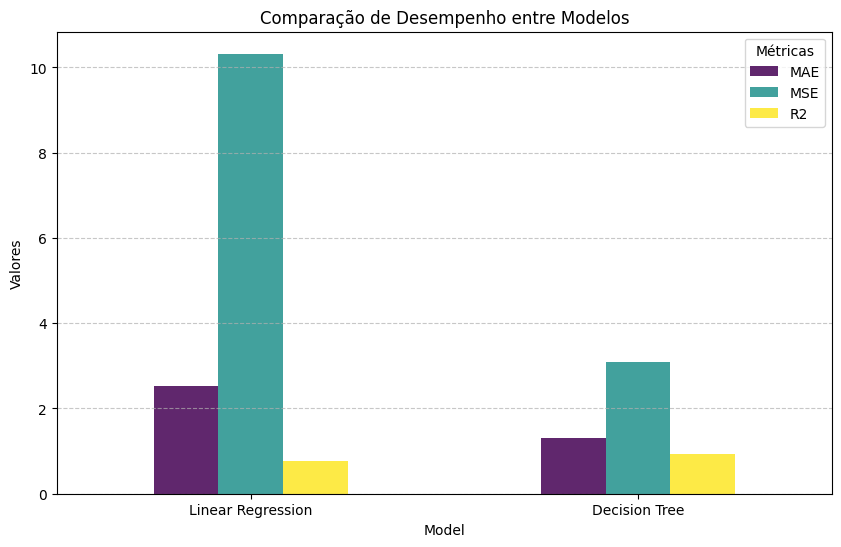

In [66]:
# Gráfico de Comparação
comparison_results_df.set_index("Model", inplace=True)
comparison_results_df.plot(kind="bar", figsize=(10, 6), colormap="viridis", alpha=0.85)
plt.title("Comparação de Desempenho entre Modelos")
plt.ylabel("Valores")
plt.xticks(rotation=0)
plt.legend(title="Métricas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()